In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Df:
    def __init__(self,fw):
        df = pd.read_csv('regressors/scores.{}.n1'.format(fw))
        self.df = df[df['Layer']!='Flatten']
        self.fw = fw
        
        self.layers = list(self.reg('LinearRegression')['Layer'])
        self.regressors = list(self.lay('Convolutional 2D')['Regressor'])
        
        self.the = {'tflow':'TensorFlow', 'ptorch':'PyTorch'}
    
    def select(self, x, y):
        return self.df[self.df[x]==y]
    
    def lay(self, x):
        return self.select('Layer', x)
    
    def reg(self, x):
        return self.select('Regressor', x)
    
    def sub(self, nrows, ncols, title, scale, fsize=40):
        fig, axs = plt.subplots(nrows, ncols, figsize=[scale*6.4, scale*4.8], constrained_layout=True,
                                sharey='row')
        fig.suptitle(title, fontsize=fsize)
        return fig, axs
        
    def plot(self, ax, layer, metric, fsize=40, prep = lambda x:x):
        df = self.lay(layer)
        metr_ls = list(df[metric])
        ax.barh(range(1,9), list(map(prep,metr_ls)), tick_label=df['Regressor'])
        ax.set_xlabel(layer, fontsize=fsize)
        ax.tick_params(labelsize=fsize)
        ax.grid(b=True)
        
    def plot_rmse(self):
        fig, axs = self.sub(2,4,'RMSEx10^3 - {}'.format(self.the[self.fw]),6)
        for ax,layer in zip(axs.flat,self.layers):
            self.plot(ax,layer,'RMSE',prep=lambda x:x*10**3)
            
        fig.savefig('regressors/{}_rmse'.format(self.fw), facecolor='white')
        
    def plot_r2(self):
        fig, axs = self.sub(2,4,'max(0,R^2) - {}'.format(self.the[self.fw]),6)
        for ax,layer in zip(axs.flat,self.layers):
            self.plot(ax,layer,'R^2',prep=lambda x:max(0,x))
        
        for ax in axs.flat:
            ax.set_xlim([0,1])
            
        fig.savefig('regressors/{}_r2'.format(self.fw), facecolor='white')
        

In [3]:
fws = ['tflow', 'ptorch']

In [4]:
tf = Df('tflow')
pt = Df('ptorch')

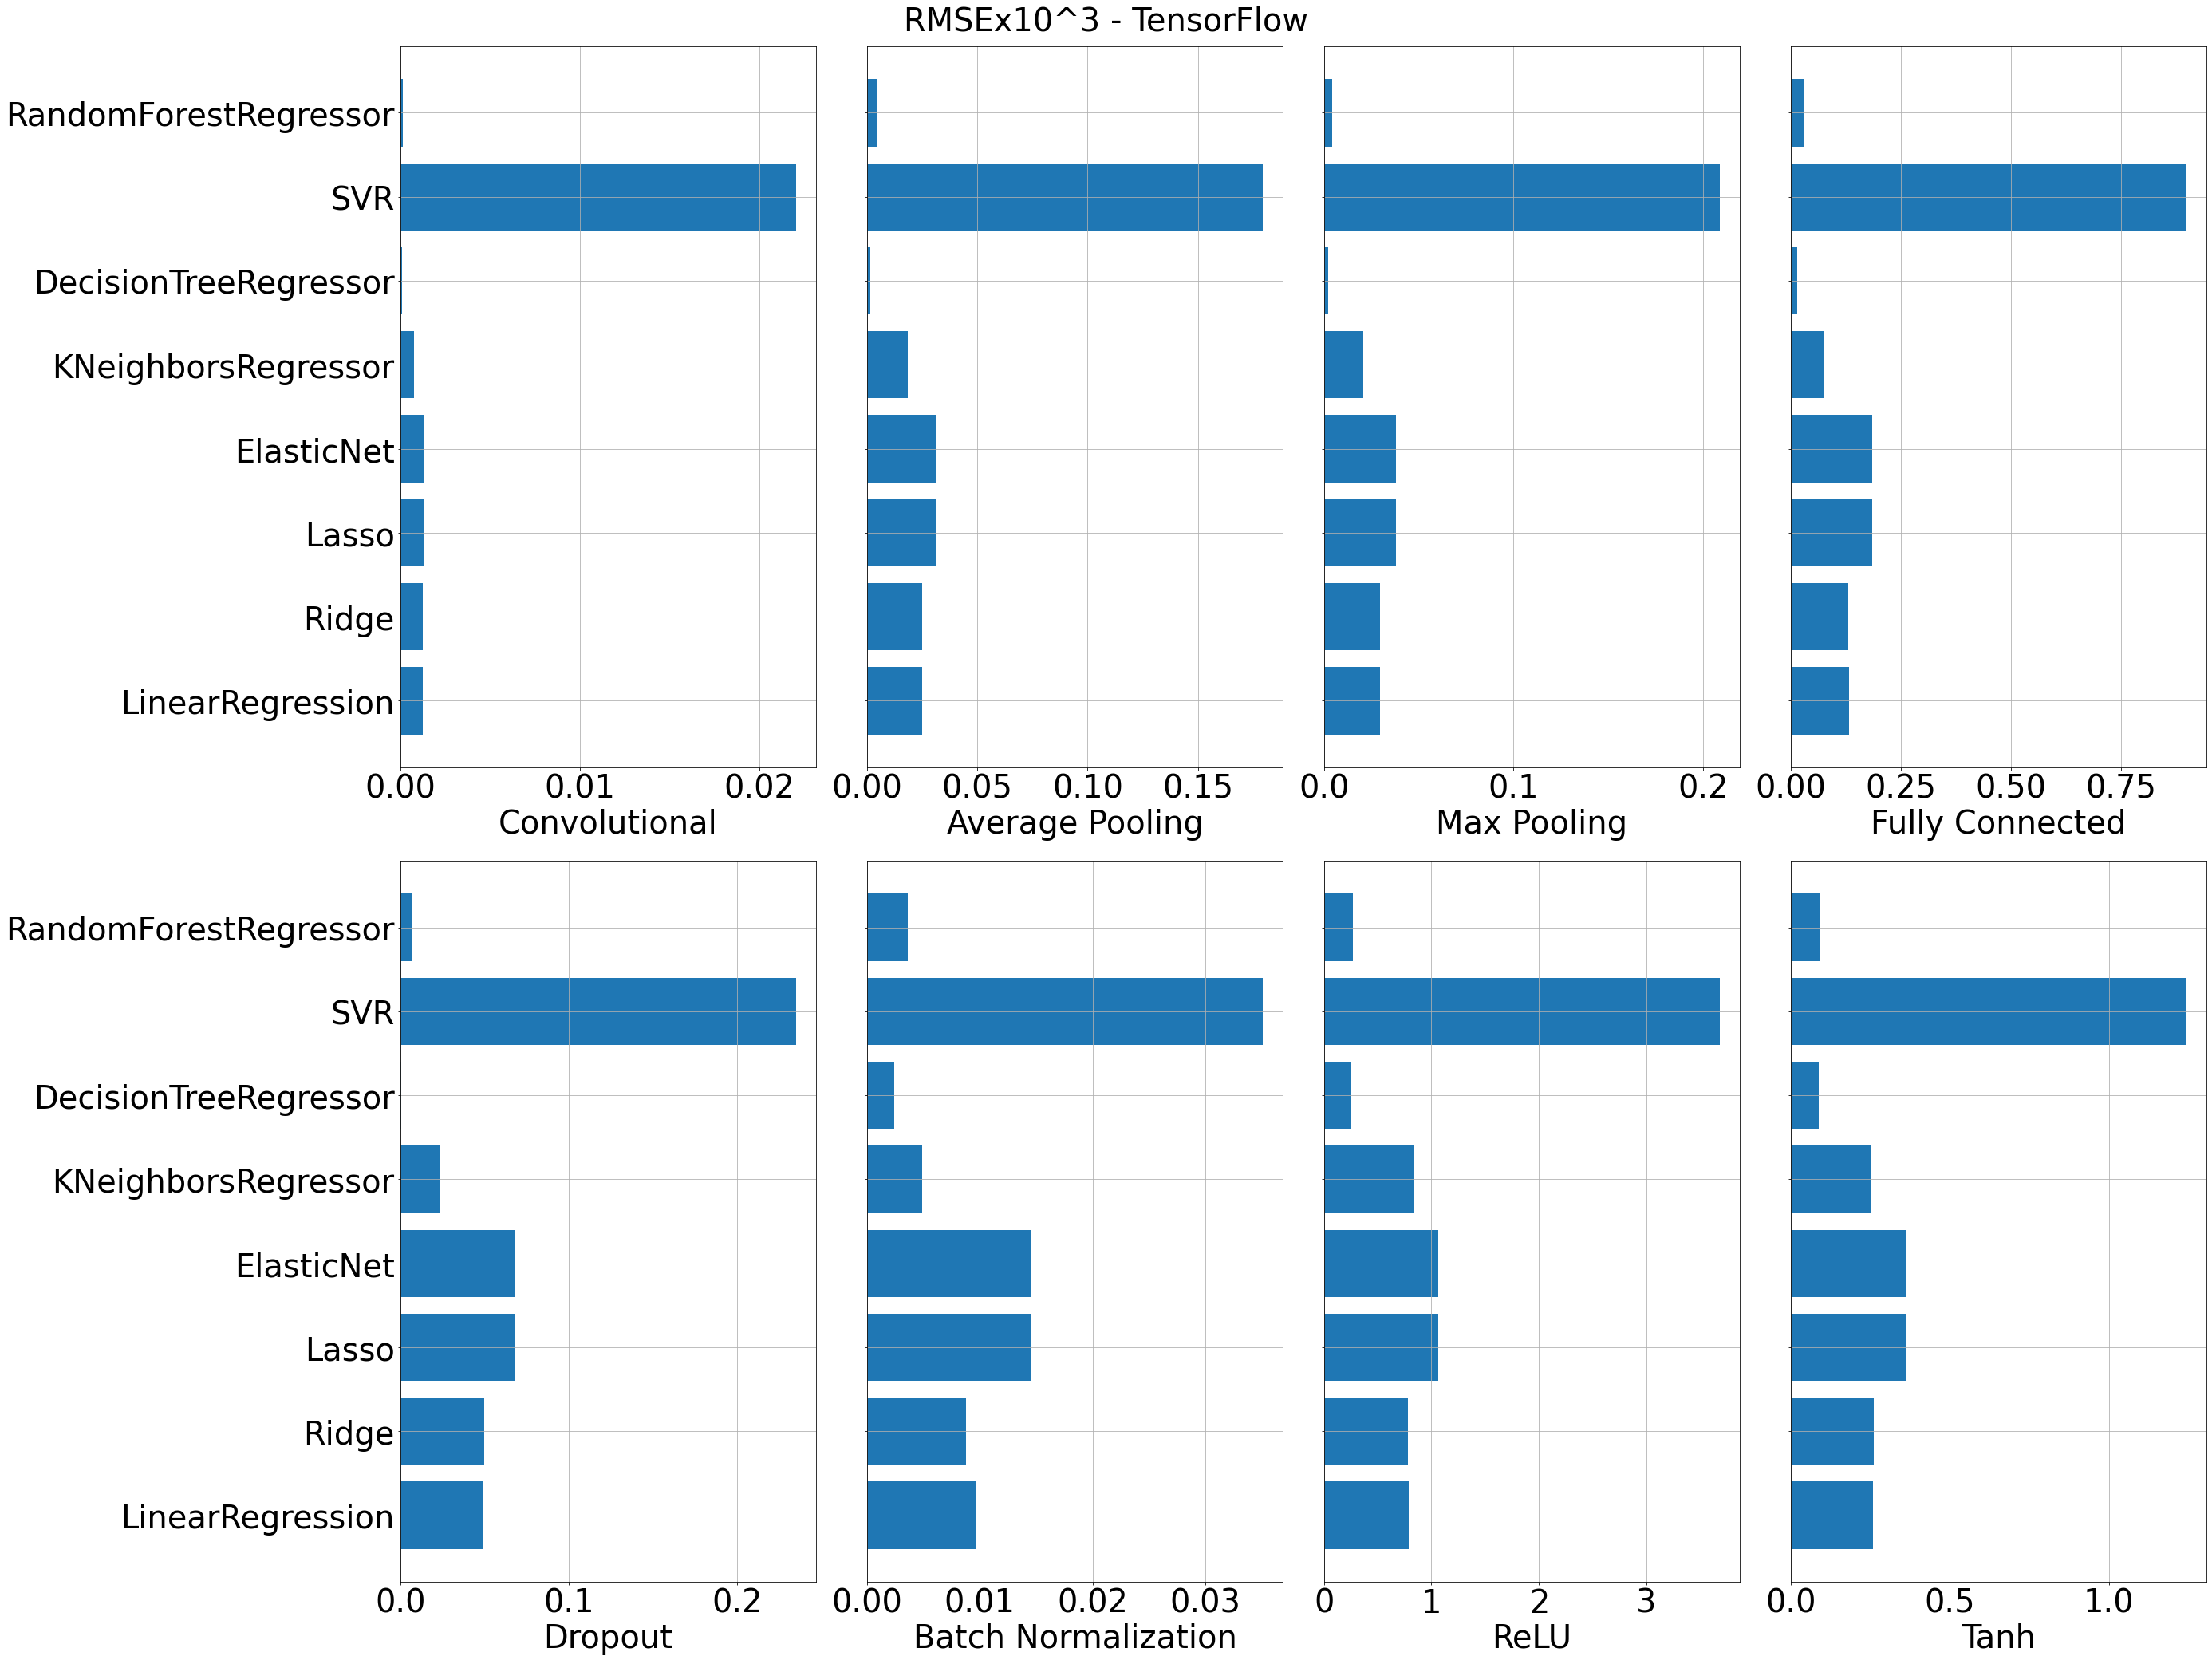

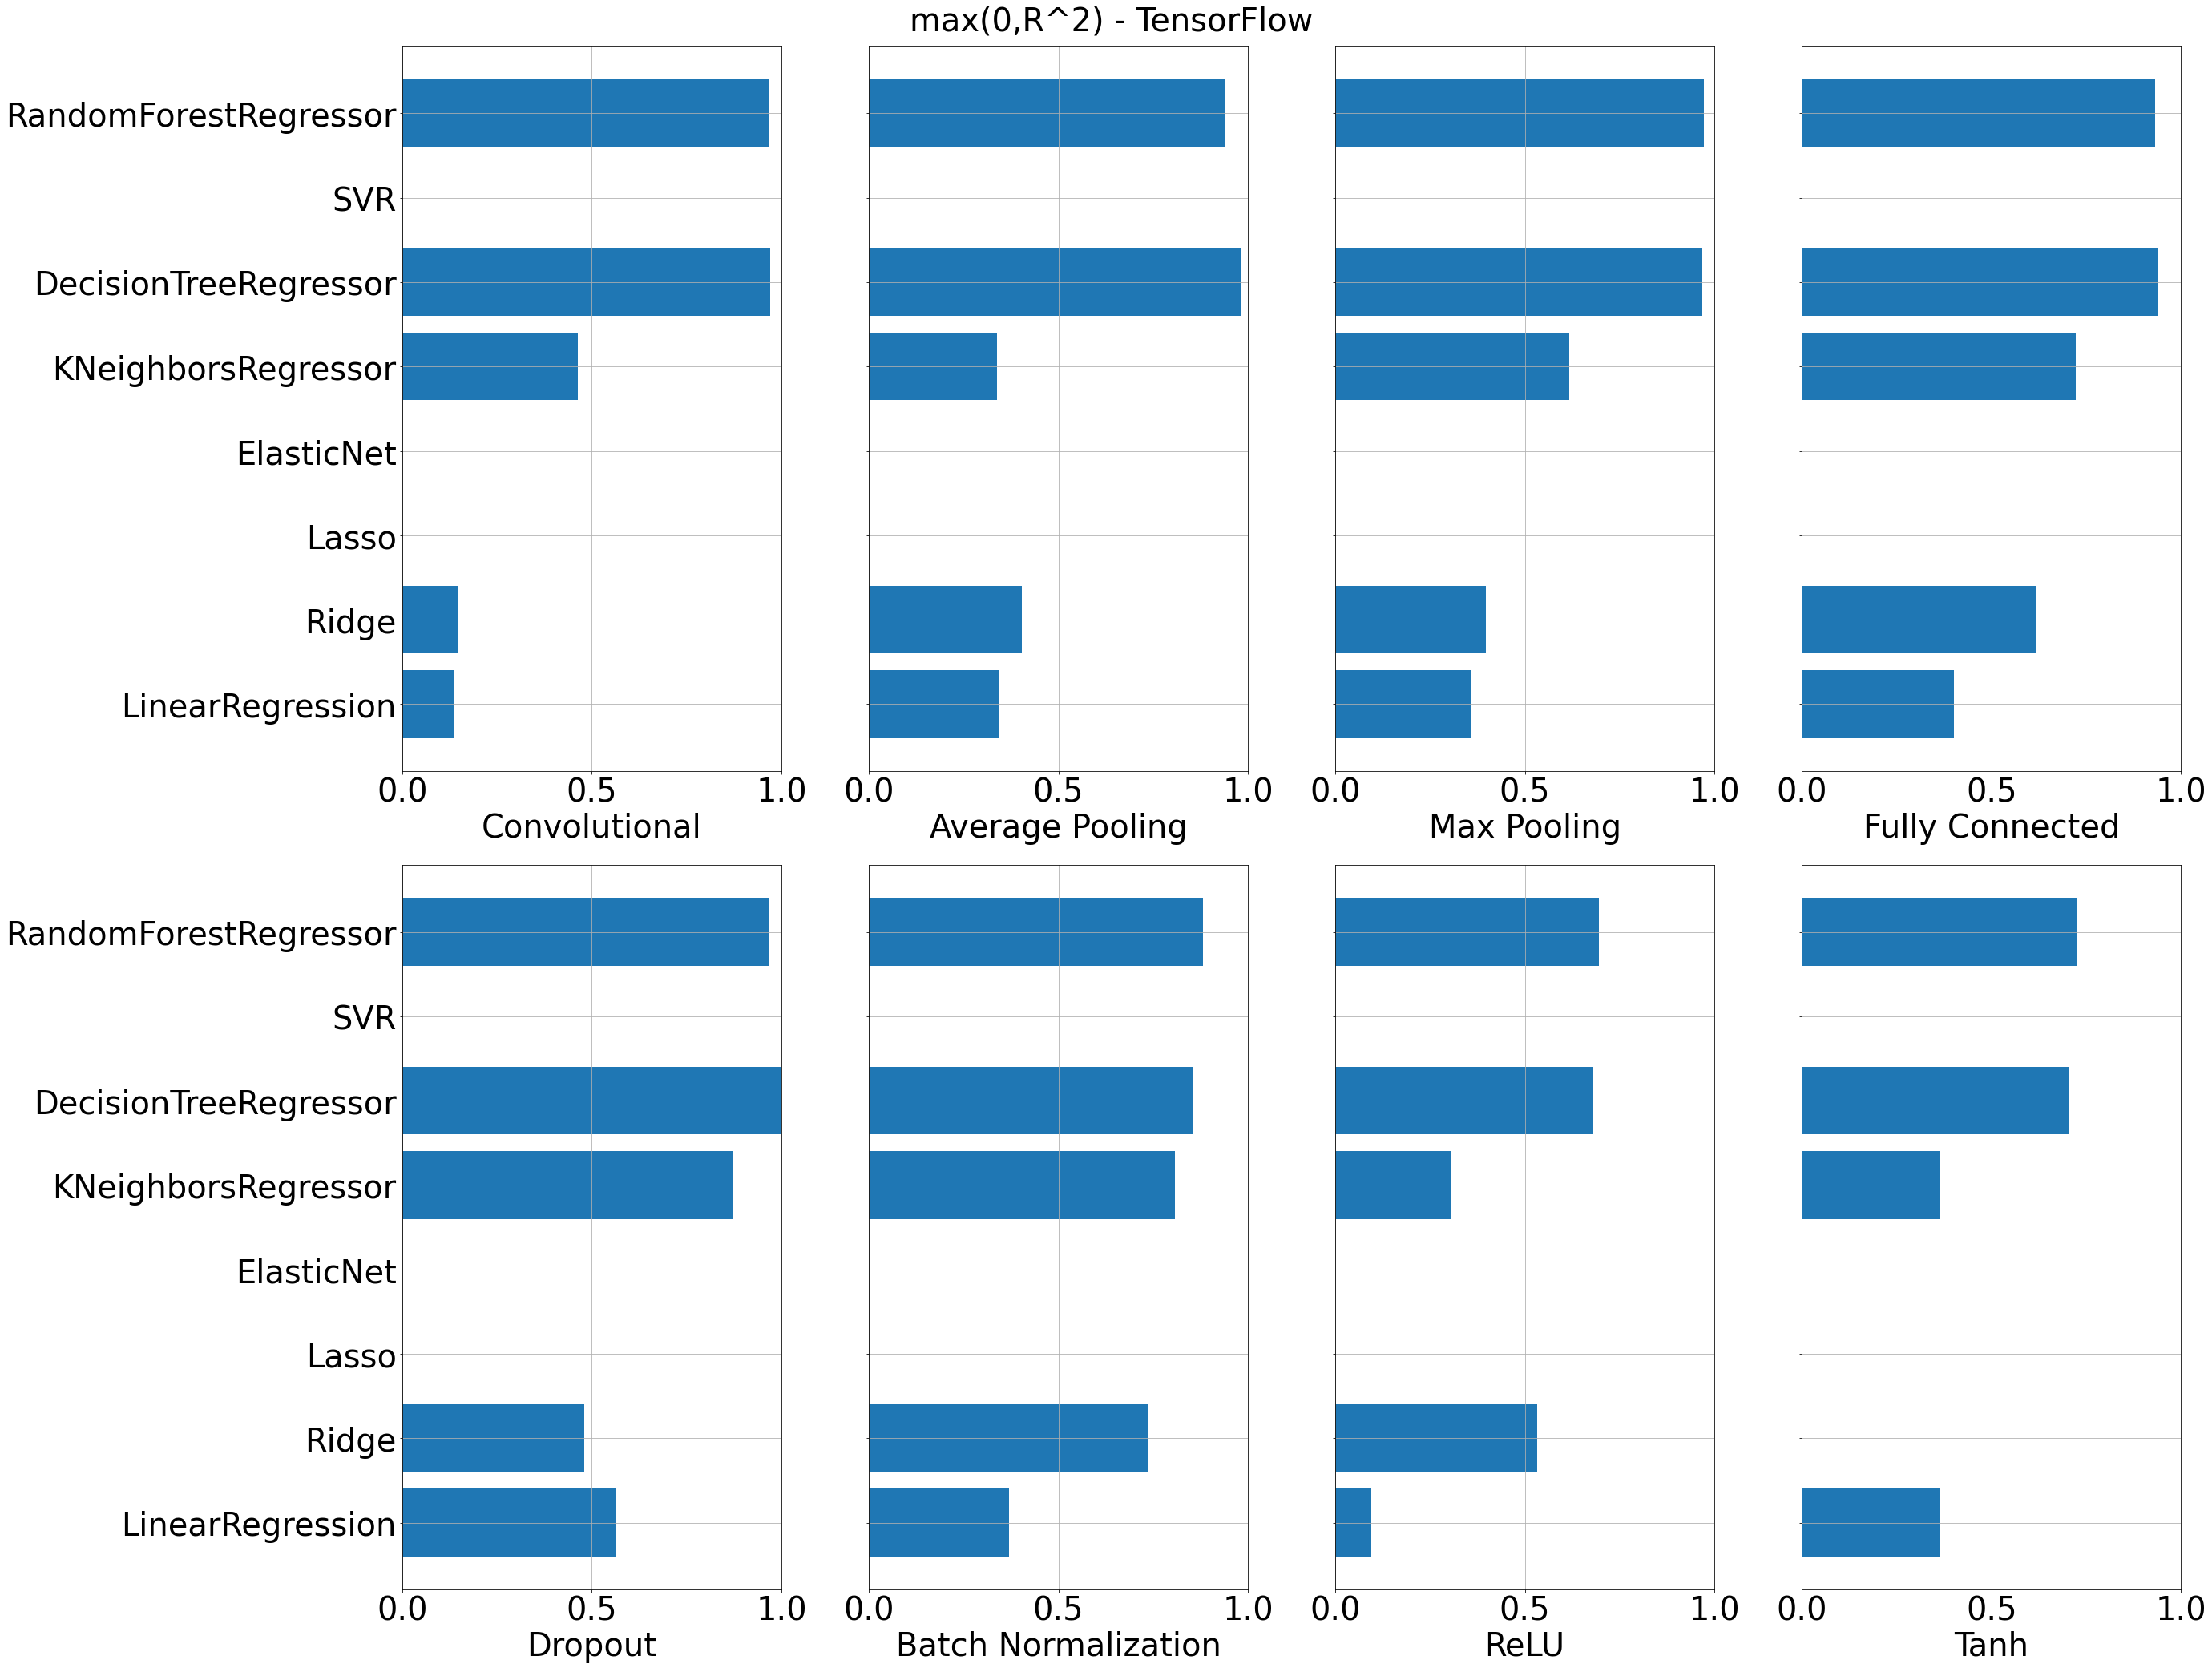

In [5]:
tf.plot_rmse()
tf.plot_r2()

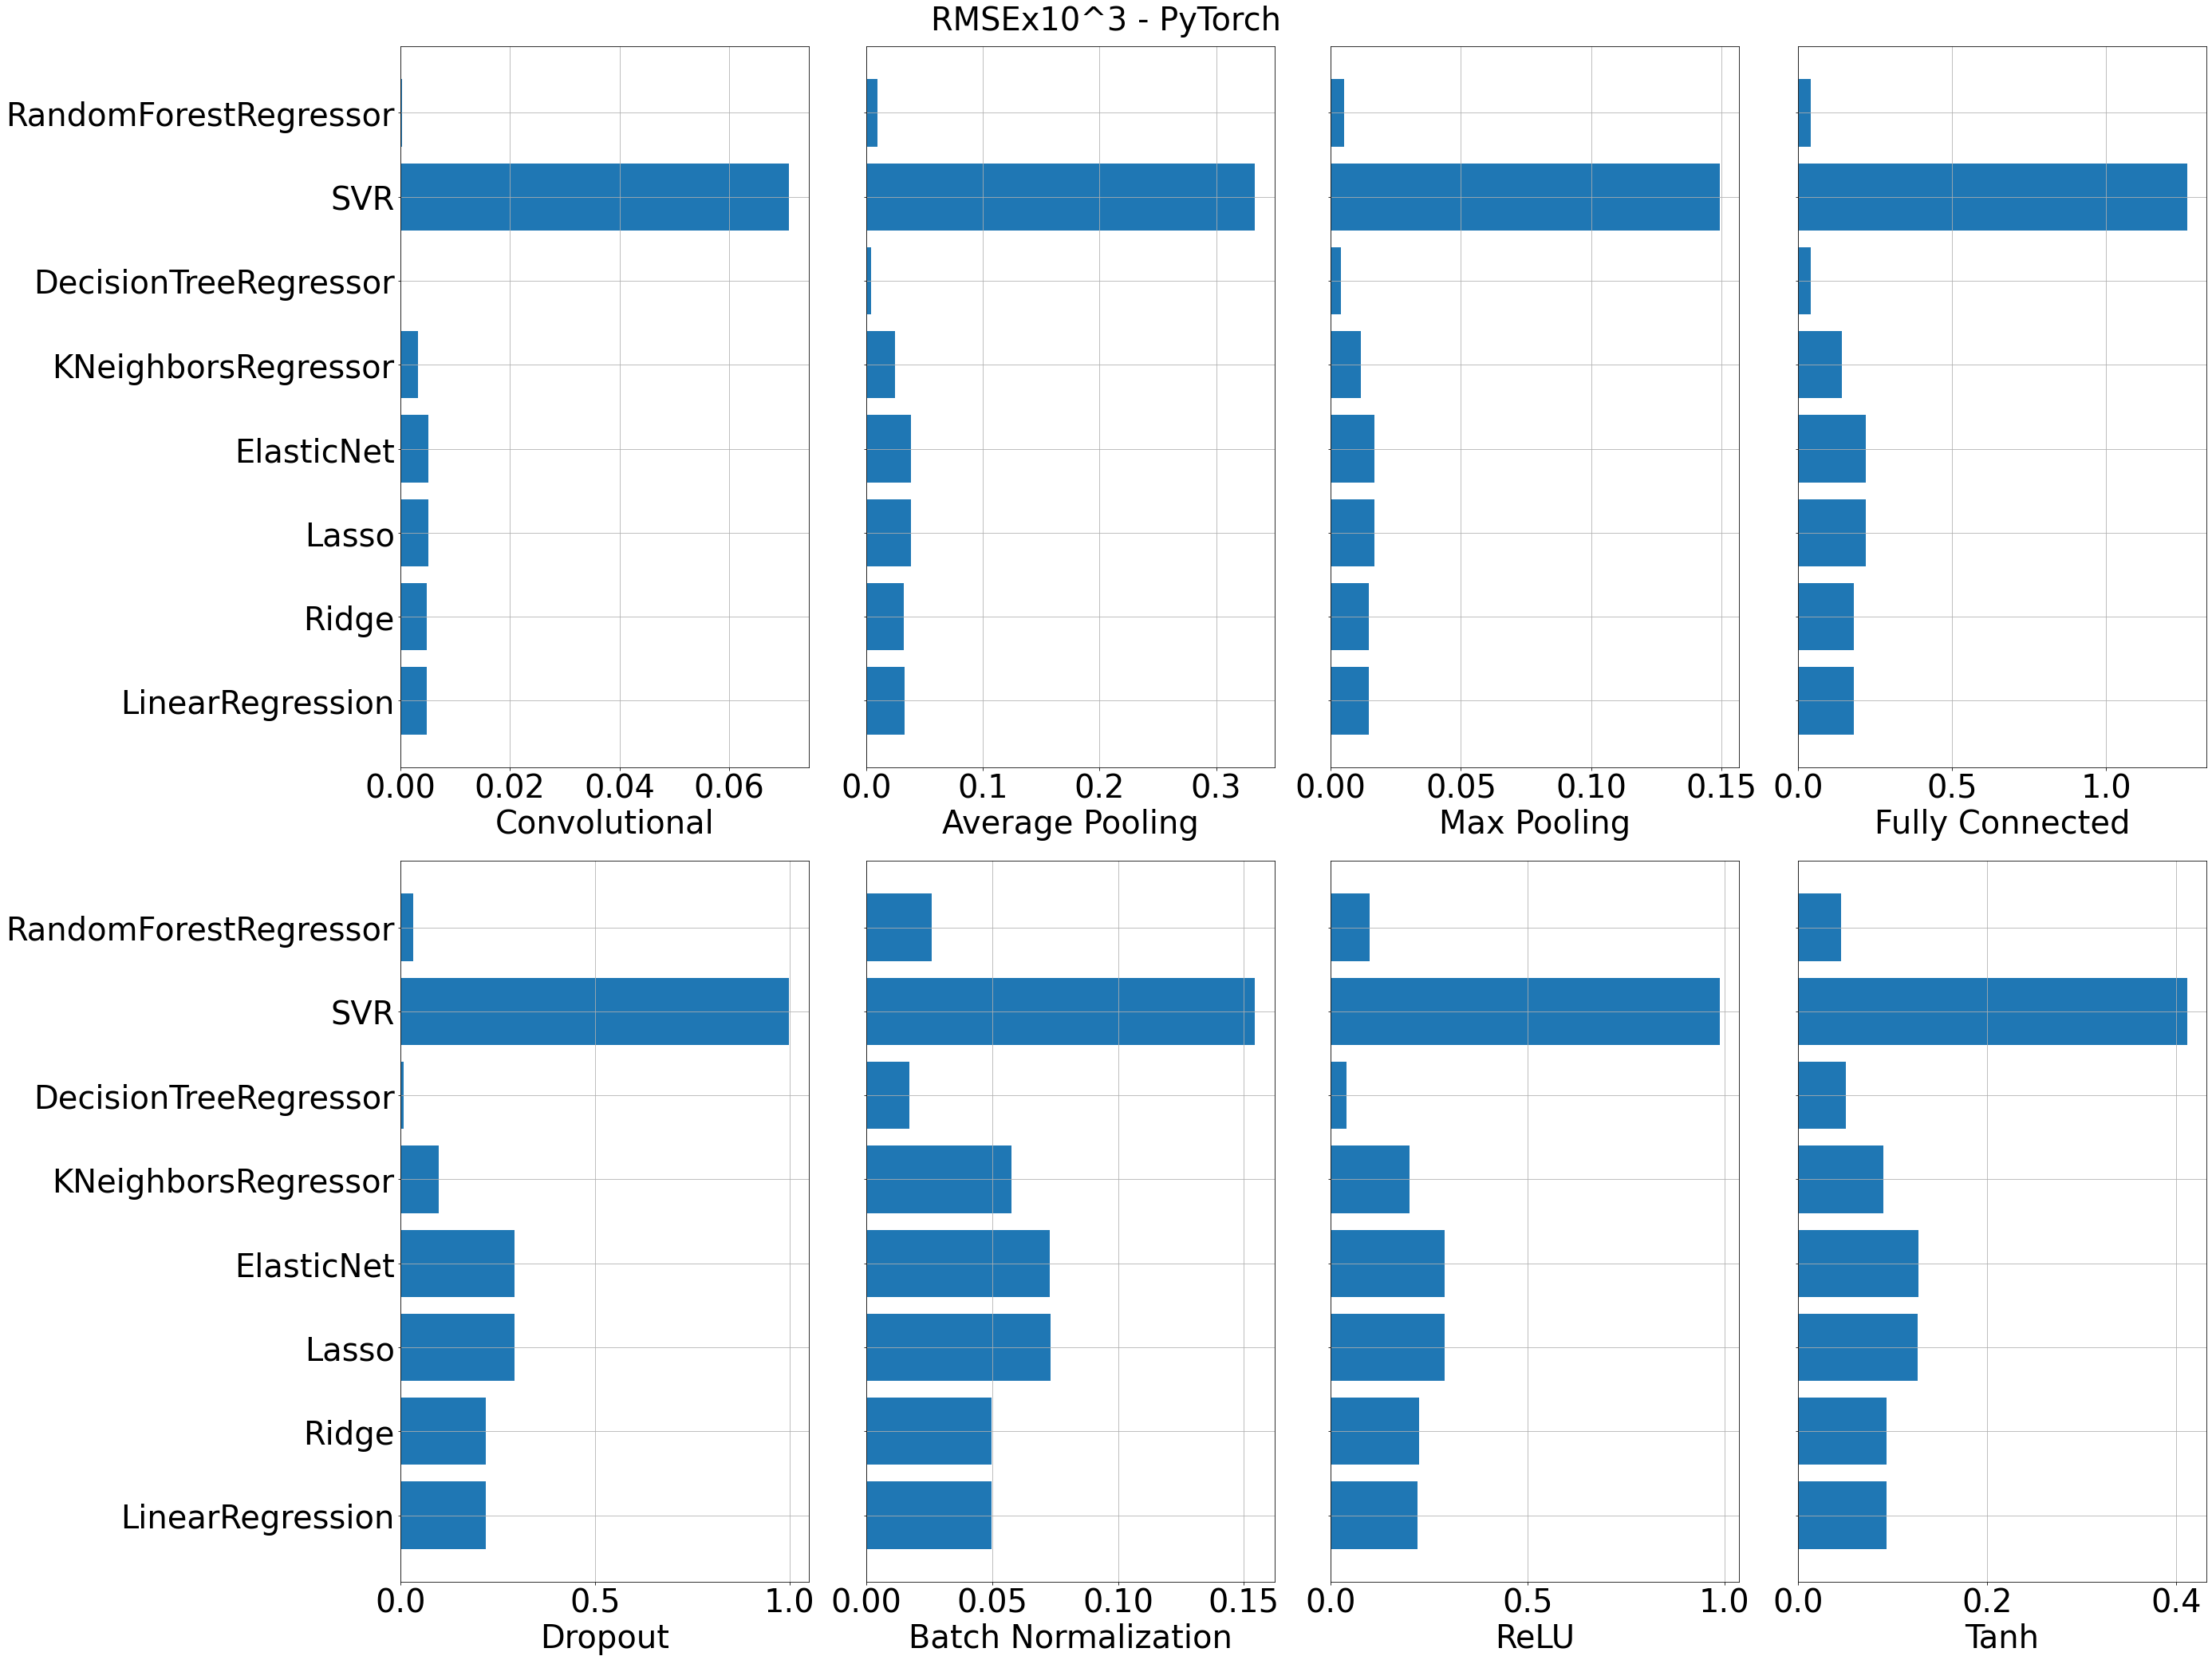

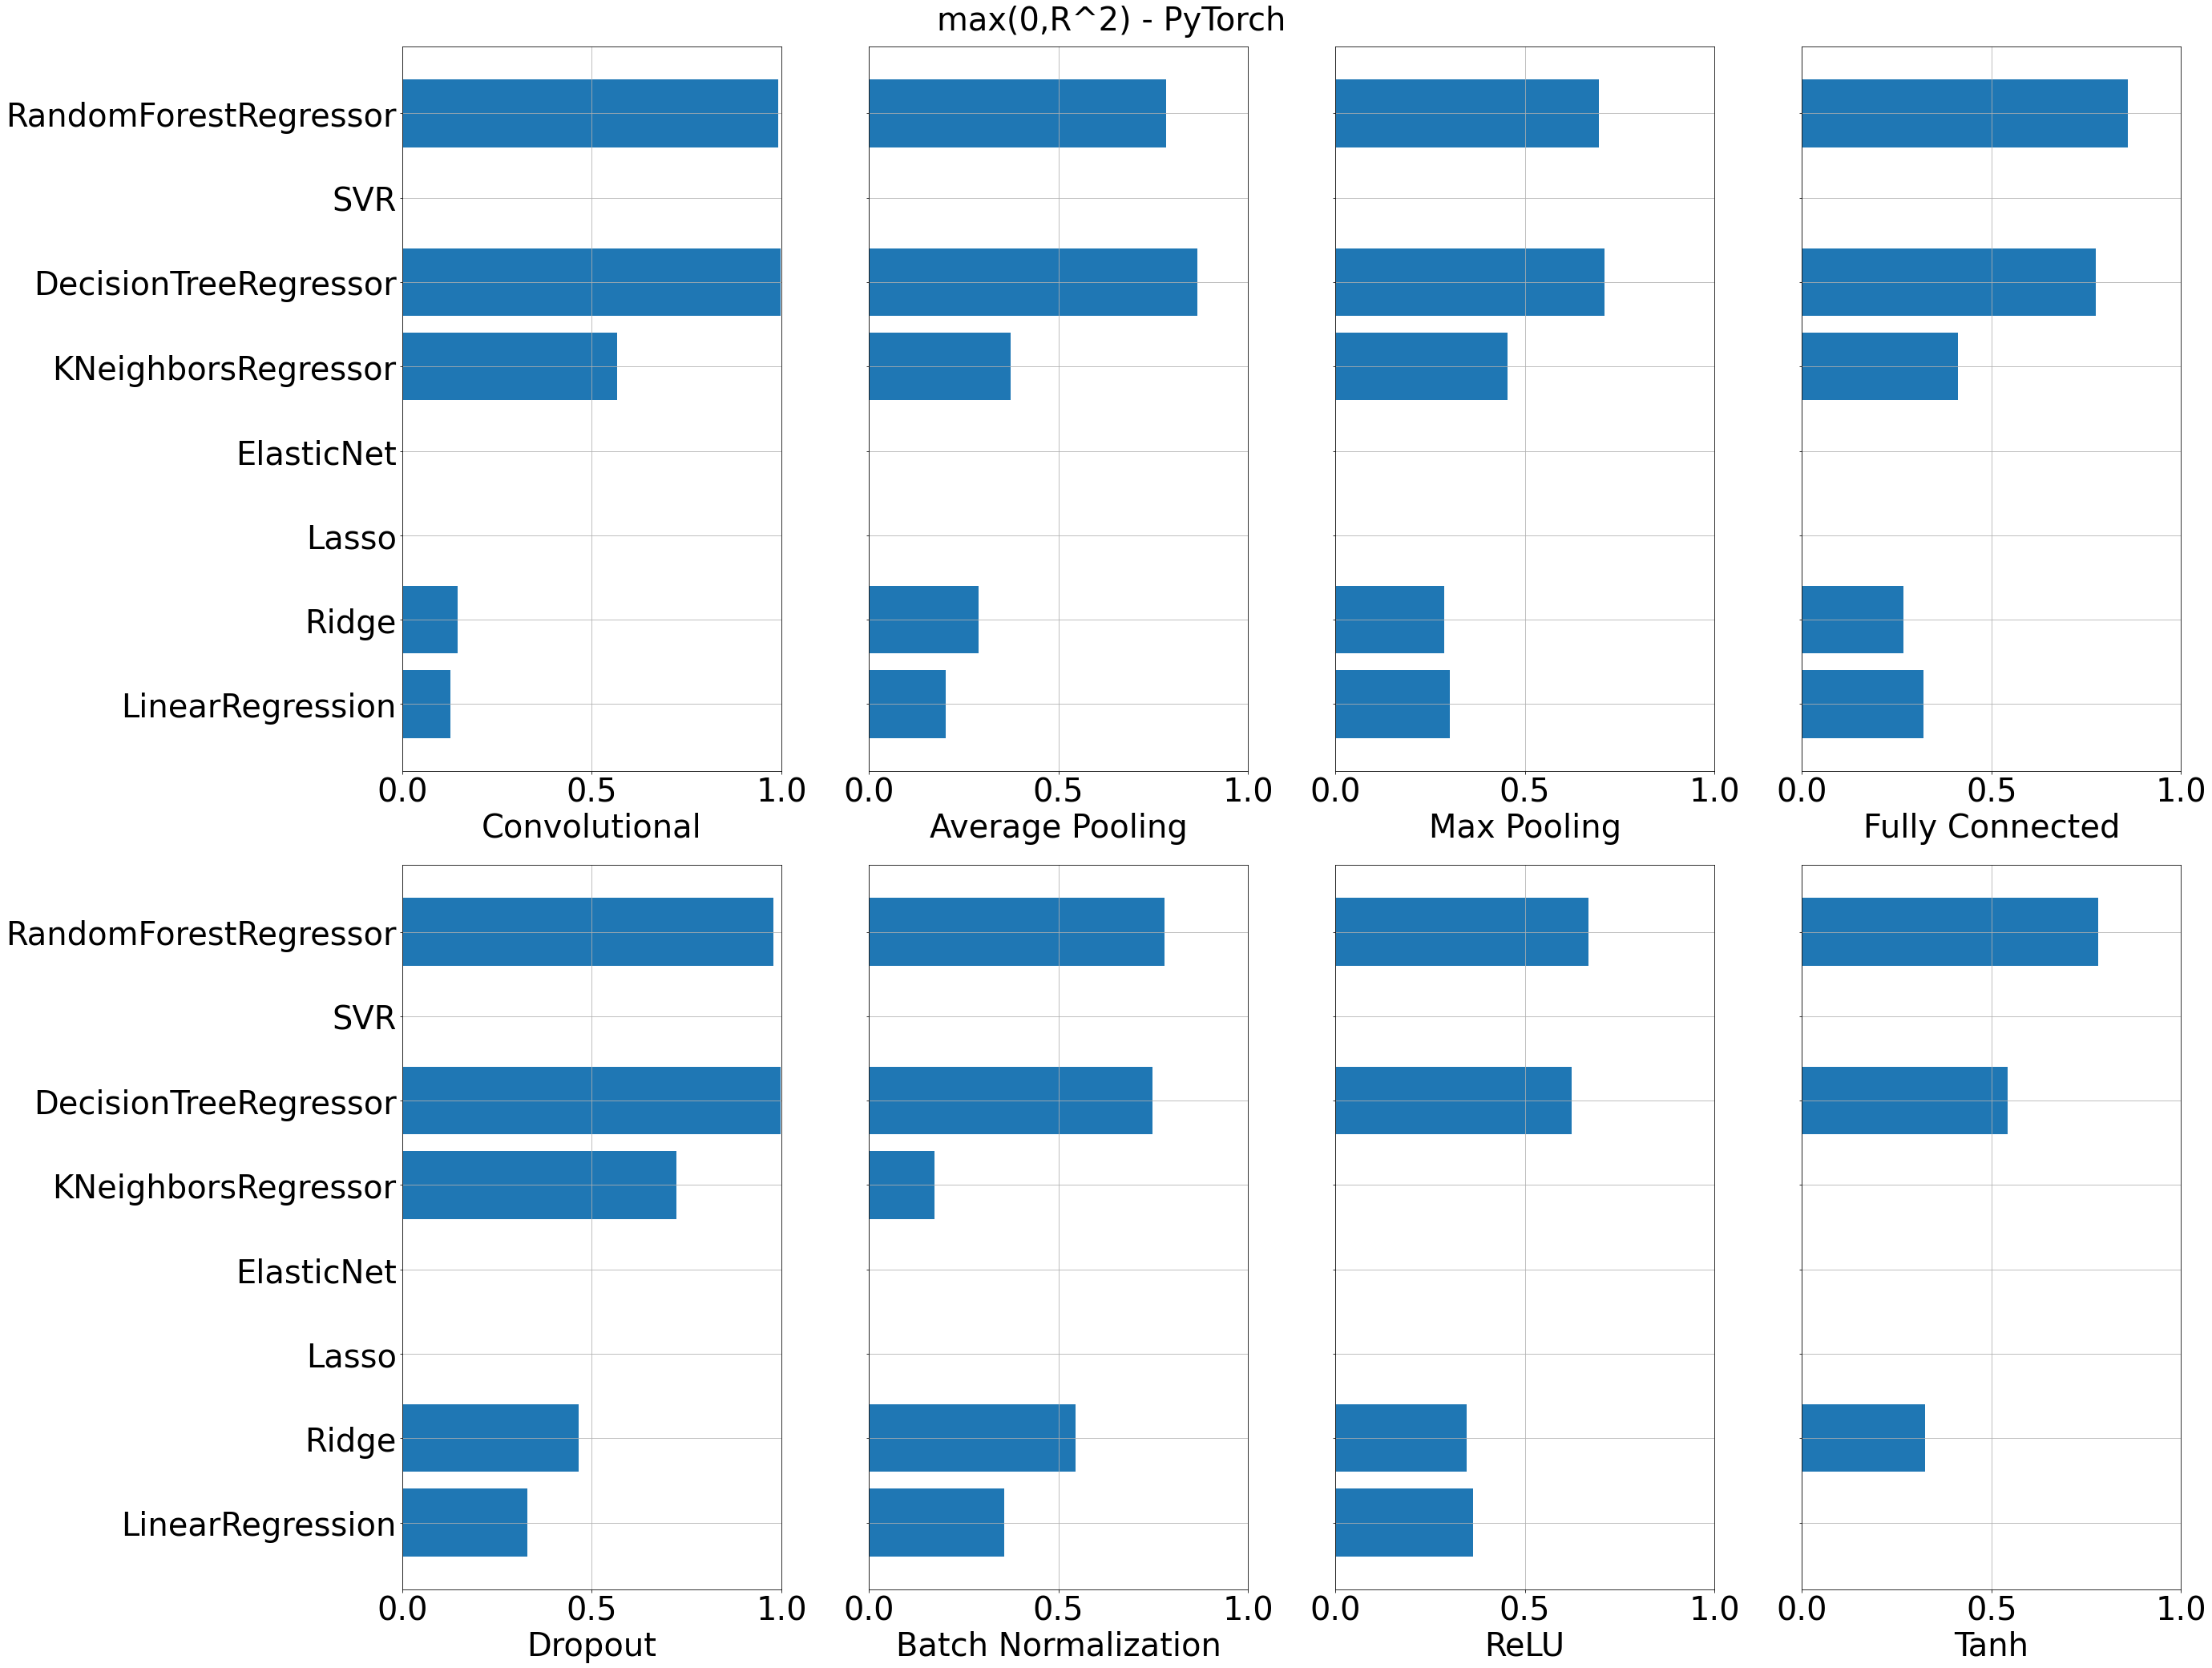

In [6]:
pt.plot_rmse()
pt.plot_r2()